# CS638 Vision Zero Madison

#### Author: Ming Hsuan, Kuo
#### Group: 2



### Monthly Accident Count Distribution
- Question raised: What are the most clustered month of accident happening over the years?


In [43]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
#from matplotlib.dates import date2num
import seaborn as sns
import chart_studio.plotly as py
import plotly.tools as tls
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()
import warnings
warnings.filterwarnings('ignore')
from collections import deque

# read data
df = pd.read_csv('Madison_crash_2009_2019.csv')


In [44]:
# Check dataframe information
df.head(5)

,DOCTNMBR,ACCDDATE,NTFYHOUR,REGION,COUNTY,MUNICIPALITY,MUNITYPE,ONHWYRP,ONHWYDIR,ONHWY,...,POSTSPD2,AGE2,SEX2,INJSVR2,SAFETY2,DRVRPC2,STNM21,STNM22,WISLR_LATDECDG,WISLR_LONDECDG
0,9BBDMB6,2009-05-03,1,SW,DANE,MADISON,C,12.0,E,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9BG0RZB,2012-11-25,0,SW,DANE,MADISON,C,12.0,E,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9BHD88Z,2012-04-06,14,SW,DANE,MADISON,C,12.0,E,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9BG0RTW,2011-04-22,13,SW,DANE,MADISON,C,12.0,E,12,...,55.0,48.0,F,,SH/LP,NaN,,,43.102213,-89.515608
4,9BF2MH3,2010-10-03,10,SW,DANE,MADISON,C,12.0,E,12,...,55.0,53.0,M,,SH/LP,FTC,,,43.091792,-89.520089


In [45]:
df["ACCDSVR"].dropna().unique()

array(['INJ', 'PD', 'FAT'], dtype=object)

#### Get month and year bin

In [59]:
dftime= pd.to_datetime(df["ACCDDATE"])
df["ACCDMONTH"] = ""
df["ACCDYEAR"] = ""
for i in range(len(dftime)):
    #get month bin
    df["ACCDMONTH"][i] = dftime[i].month
    if dftime[i].year != 2019:
        #get year bin
        df["ACCDYEAR"][i] = dftime[i].year
    else:
        df["ACCDYEAR"][i] = None


### Distribution plot
- plot according to monthly accident count.
- Lines are seperated by year to check if the trend of accident migrates.


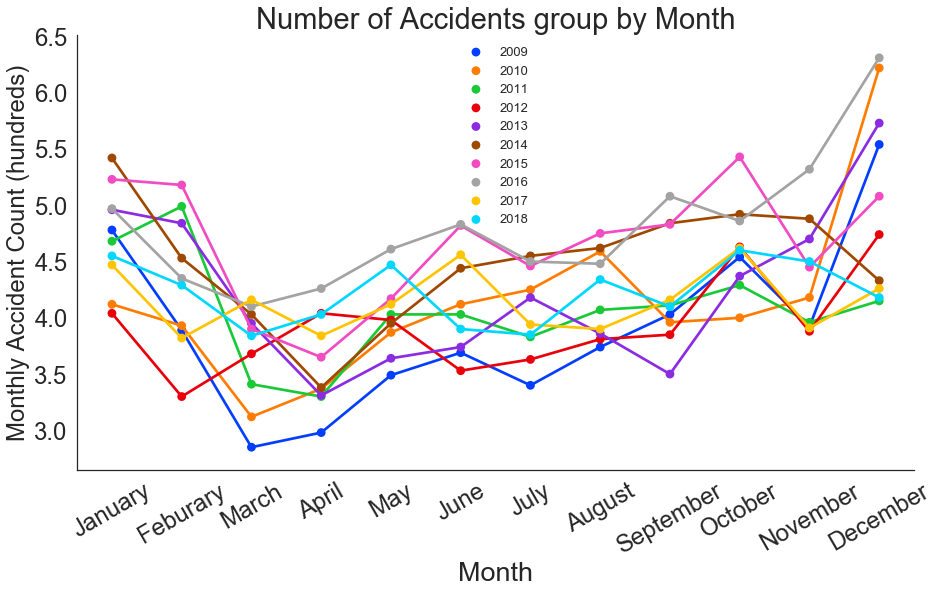

In [60]:
ACCDMONTH_ACCDYEAR = df.groupby(['ACCDMONTH','ACCDYEAR']).count()['DOCTNMBR'].to_frame().reset_index()
fontSize = 24
sns.set(font_scale=1.5,style="white")
plt.figure(figsize=(15,8))
ACCDMONTH_ACCDYEAR_POINTPLOT = sns.pointplot(x='ACCDMONTH', y='DOCTNMBR', hue='ACCDYEAR', data=ACCDMONTH_ACCDYEAR, palette = 'bright',capsize=0.1, frameon = False)
ACCDMONTH_ACCDYEAR_LEG = ACCDMONTH_ACCDYEAR_POINTPLOT.get_legend_handles_labels()[0]

# set up legend
x_tick_year_list = [i for i in range(2009,2019)]
ACCDMONTH_ACCDYEAR_POINTPLOT.legend(ACCDMONTH_ACCDYEAR_LEG, x_tick_year_list, frameon = False, title='',fontsize = 13)
ACCDMONTH_ACCDYEAR_POINTPLOT.set_title('Number of Accidents group by Month', fontsize = fontSize + 5)
ACCDMONTH_ACCDYEAR_POINTPLOT.set_xlabel('Month', fontsize = fontSize + 3)
ACCDMONTH_ACCDYEAR_POINTPLOT.set_ylabel('Monthly Accident Count (hundreds)', fontsize = fontSize)

# set up x,y tick labels
month_list = ["January","Feburary","March","April","May","June","July","August","September","October","November","December"]
ACCDMONTH_ACCDYEAR_POINTPLOT.set_xticklabels(month_list, rotation=30, fontsize = fontSize)
ticks = ACCDMONTH_ACCDYEAR_POINTPLOT.get_yticks()/100
ACCDMONTH_ACCDYEAR_POINTPLOT.set_yticklabels(ticks,fontsize = fontSize)

# set right and top border to invisible
ACCDMONTH_ACCDYEAR_POINTPLOT.spines['right'].set_visible(False)
ACCDMONTH_ACCDYEAR_POINTPLOT.spines['top'].set_visible(False)

### Take away

There is a clear trend that the period from November to January is a high season for accidents and March to May is the relatively low season.

###  Plot adjustment
The following graph is the version that drags the y bottom limit to zero.

but I found this adjustment makes this plot more clsutered and harder to understand.

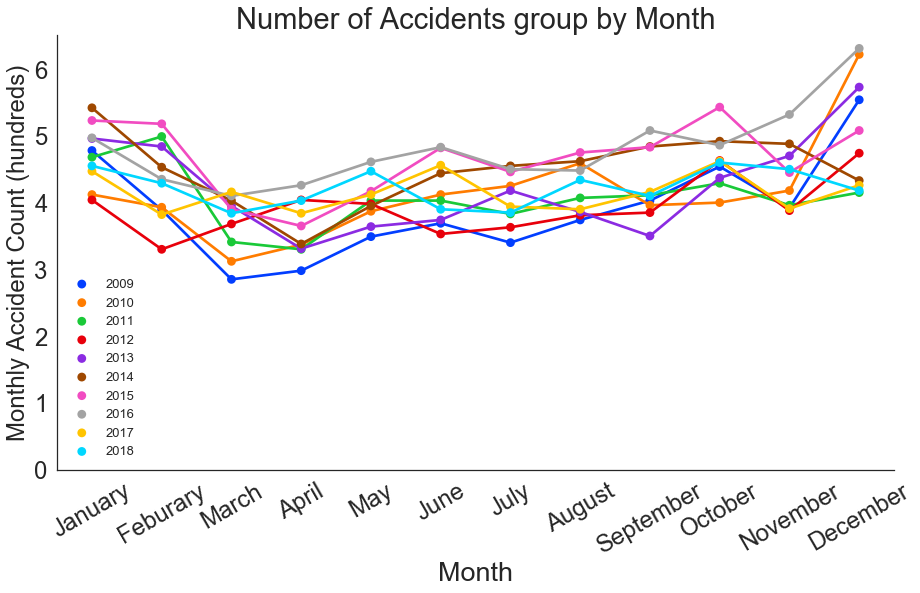

In [61]:
ACCDMONTH_ACCDYEAR = df.groupby(['ACCDMONTH','ACCDYEAR']).count()['DOCTNMBR'].to_frame().reset_index()
fontSize = 24
sns.set(font_scale=1.5,style="white")
plt.figure(figsize=(15,8))
ACCDMONTH_ACCDYEAR_POINTPLOT = sns.pointplot(x='ACCDMONTH', y='DOCTNMBR', hue='ACCDYEAR', data=ACCDMONTH_ACCDYEAR, palette = 'bright',capsize=0.1, frameon = False)
ACCDMONTH_ACCDYEAR_LEG = ACCDMONTH_ACCDYEAR_POINTPLOT.get_legend_handles_labels()[0]

# set up legend
x_tick_year_list = [i for i in range(2009,2019)]
ACCDMONTH_ACCDYEAR_POINTPLOT.legend(ACCDMONTH_ACCDYEAR_LEG, x_tick_year_list, frameon = False, title='',fontsize = 13)
ACCDMONTH_ACCDYEAR_POINTPLOT.set_title('Number of Accidents group by Month', fontsize = fontSize + 5)
ACCDMONTH_ACCDYEAR_POINTPLOT.set_xlabel('Month', fontsize = fontSize + 3)
ACCDMONTH_ACCDYEAR_POINTPLOT.set_ylabel('Monthly Accident Count (hundreds)', fontsize = fontSize)

# set up x,y tick labels
month_list = ["January","Feburary","March","April","May","June","July","August","September","October","November","December"]
ACCDMONTH_ACCDYEAR_POINTPLOT.set_xticklabels(month_list, rotation=30, fontsize = fontSize)
ticks = ACCDMONTH_ACCDYEAR_POINTPLOT.get_yticks()//100
axes = ACCDMONTH_ACCDYEAR_POINTPLOT.axes
from collections import deque
tickQue = deque(ticks)
zeroer = [0,1.0,1.5,2.0]
for i in zeroer[::-1]:
    tickQue.appendleft(i)
yTick = [0]
for i in range(len(tickQue)):
    if i%2:
        yTick.append(int(tickQue[i]))
axes.set_ylim(0,)
ACCDMONTH_ACCDYEAR_POINTPLOT.set_yticklabels(yTick,fontsize = fontSize)

# set right and top border to invisible
ACCDMONTH_ACCDYEAR_POINTPLOT.spines['right'].set_visible(False)
ACCDMONTH_ACCDYEAR_POINTPLOT.spines['top'].set_visible(False)

## Next Question: When did most INJURY and FATAL cases happened?

Due to the fact that my teammate found that most of the accidents are minor and the final outcome didn't come with injury. So I'm more curious on the injured and fatally injured cases.

### Severity Distribution
- To answer the question raised above, I first plot the distribution of FATAL and INJURY cases over month.

In [73]:
# Create fatal case data
df["FATALFLAG"] = ""
df["INJFLAG"] = ""
for i in range(len(df["ACCDSVR"])):
    #print(df["ACCDSVR"][i])
    if df["ACCDSVR"][i] == 'FAT':
        df["FATALFLAG"][i] = 'FAT'
        df["INJFLAG"][i] = None
    elif df["ACCDSVR"][i] == 'INJ':
        df["INJFLAG"][i] = 'INJ'
        df["FATALFLAG"][i] = None
    else:
        df["FATALFLAG"][i] = None
        df["INJFLAG"][i] = None

In [74]:
# check data
df["FATALFLAG"].count()
df["INJFLAG"].count()

14762

Text(0, 0.5, 'Count')

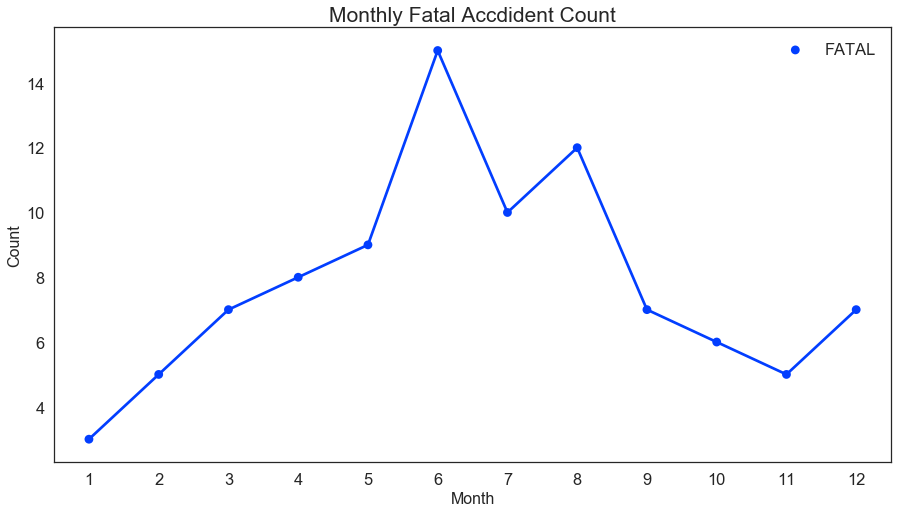

In [70]:
ACCDMONTH_FATALFLAG = df.groupby(['ACCDMONTH',"FATALFLAG"]).count()['DOCTNMBR'].to_frame().reset_index()
fontSize = 16
sns.set(font_scale=1.5,style="white")
plt.figure(figsize=(15,8))
ACCDMONTH_FATALFLAG_POINTPLOT = sns.pointplot(x='ACCDMONTH', y='DOCTNMBR', hue='FATALFLAG', data=ACCDMONTH_FATALFLAG, palette = 'bright',capsize=0.1)
ACCDMONTH_FATALFLAG_LEG = ACCDMONTH_FATALFLAG_POINTPLOT.get_legend_handles_labels()[0]
ACCDMONTH_FATALFLAG_POINTPLOT.legend(ACCDMONTH_FATALFLAG_LEG, ['FATAL'],frameon = False, title='')
ACCDMONTH_FATALFLAG_POINTPLOT.set_title('Monthly Fatal Accdident Count', fontsize = fontSize + 5)
ACCDMONTH_FATALFLAG_POINTPLOT.set_xlabel('Month', fontsize = fontSize)
ACCDMONTH_FATALFLAG_POINTPLOT.set_ylabel('Count', fontsize = fontSize)

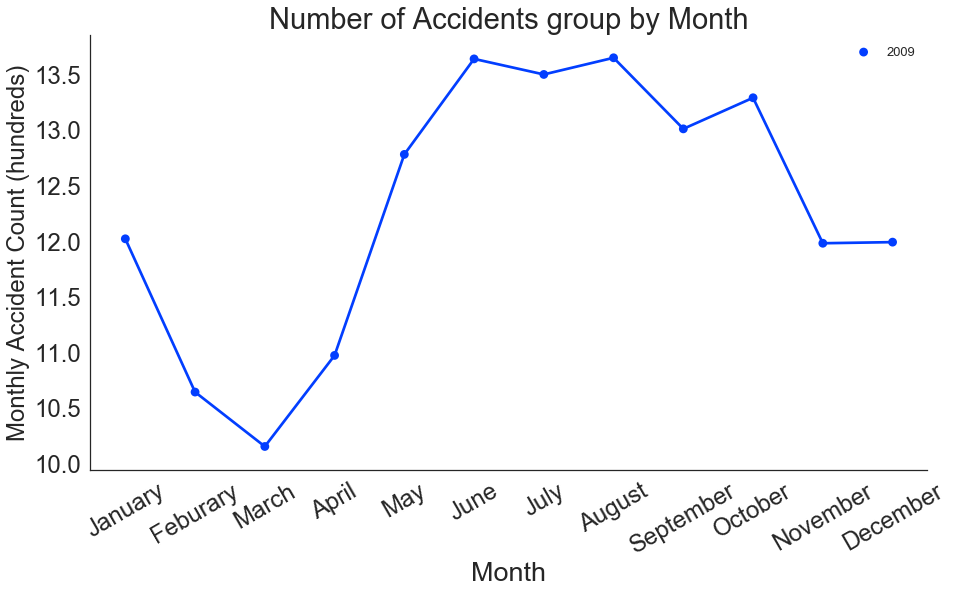

In [118]:
ACCDMONTH_INJURYFLAG = df.groupby(['ACCDMONTH',"INJFLAG"]).count()['DOCTNMBR'].to_frame().reset_index()
fontSize = 24
sns.set(font_scale=1.5,style="white")
plt.figure(figsize=(15,8))
ACCDMONTH_INJURYFLAG_POINTPLOT = sns.pointplot(x='ACCDMONTH', y='DOCTNMBR', hue='INJFLAG', data=ACCDMONTH_INJURYFLAG, palette = 'bright',capsize=0.1)
ACCDMONTH_INJURYFLAG_LEG = ACCDMONTH_INJURYFLAG_POINTPLOT.get_legend_handles_labels()[0]

# set up legend
x_tick_year_list = [i for i in range(2009,2019)]
ACCDMONTH_INJURYFLAG_POINTPLOT.legend(ACCDMONTH_INJURYFLAG_LEG, x_tick_year_list, frameon = False, title='',fontsize = 13)
ACCDMONTH_INJURYFLAG_POINTPLOT.set_title('Number of Accidents group by Month', fontsize = fontSize + 5)
ACCDMONTH_INJURYFLAG_POINTPLOT.set_xlabel('Month', fontsize = fontSize + 3)
ACCDMONTH_INJURYFLAG_POINTPLOT.set_ylabel('Monthly Accident Count (hundreds)', fontsize = fontSize)

# set up x,y tick labels
month_list = ["January","Feburary","March","April","May","June","July","August","September","October","November","December"]
ACCDMONTH_INJURYFLAG_POINTPLOT.set_xticklabels(month_list, rotation=30, fontsize = fontSize)
ticks = ACCDMONTH_INJURYFLAG_POINTPLOT.get_yticks()/100
#axes = ACCDMONTH_INJURYFLAG_POINTPLOT.axes
# from collections import deque
# tickQue = deque(ticks)
# zeroer = [0,1.0,1.5,2.0]
# for i in zeroer[::-1]:
#     tickQue.appendleft(i)
# yTick = [0]
# for i in range(len(tickQue)):
#     if i%2:
#         yTick.append(int(tickQue[i]))
#axes.set_ylim(0,)
ACCDMONTH_INJURYFLAG_POINTPLOT.set_yticklabels(ticks,fontsize = fontSize)

# set right and top border to invisible
ACCDMONTH_INJURYFLAG_POINTPLOT.spines['right'].set_visible(False)
ACCDMONTH_INJURYFLAG_POINTPLOT.spines['top'].set_visible(False)

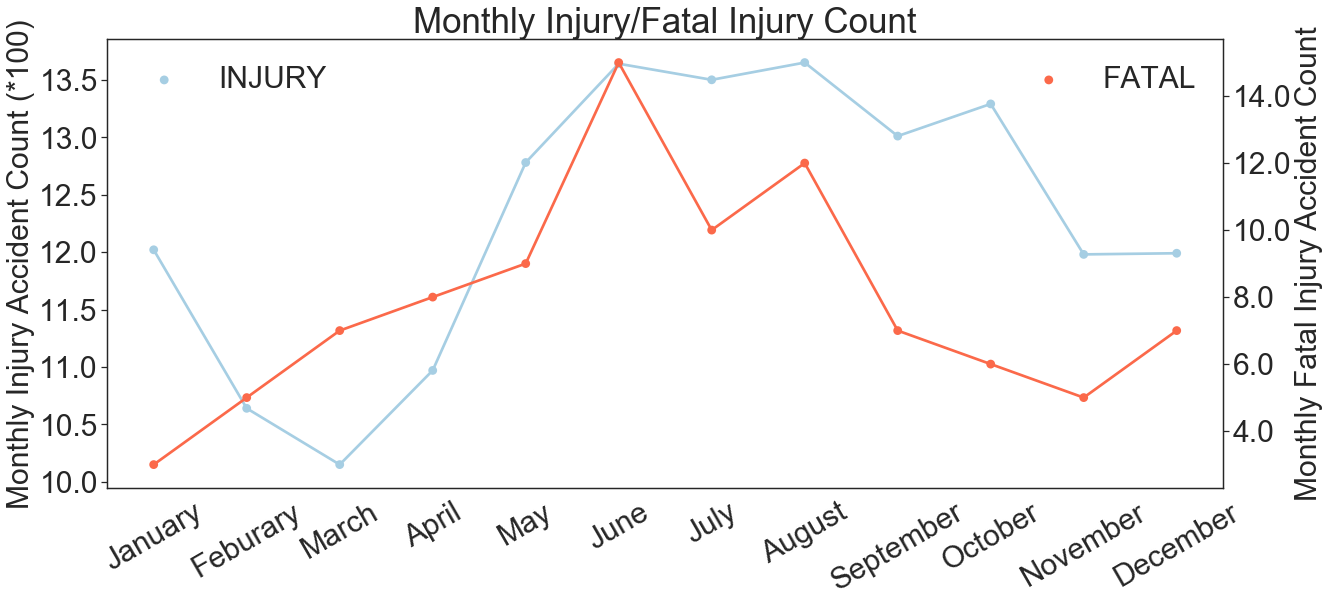

In [132]:
fig, ax1 = plt.subplots(figsize=(20, 8.27))
fontSize = 30
ax2 = ax1.twinx()

ACCDMONTH_INJURYFLAG_POINTPLOT = sns.pointplot(x='ACCDMONTH', y='DOCTNMBR', hue='INJFLAG', data=ACCDMONTH_INJURYFLAG, palette = "Paired",capsize=0.1, ax = ax1)
ACCDMONTH_FATALFLAG_POINTPLOT = sns.pointplot(x='ACCDMONTH', y='DOCTNMBR', hue='FATALFLAG', data=ACCDMONTH_FATALFLAG, palette = 'Reds',capsize=0.1, ax = ax2)

# set left legend
ACCDMONTH_INJURYFLAG_LEG = ACCDMONTH_INJURYFLAG_POINTPLOT.get_legend_handles_labels()[0]
ACCDMONTH_INJURYFLAG_POINTPLOT.legend(ACCDMONTH_INJURYFLAG_LEG, ["INJURY"], frameon = False, title='',fontsize = fontSize,loc='upper left')

# set right legend
ACCDMONTH_FATALFLAG_LEG = ACCDMONTH_FATALFLAG_POINTPLOT.get_legend_handles_labels()[0]
ACCDMONTH_FATALFLAG_POINTPLOT.legend(ACCDMONTH_FATALFLAG_LEG, ["FATAL"], frameon = False, title='',fontsize = fontSize,loc='upper right')


# set left axis 
ACCDMONTH_INJURYFLAG_POINTPLOT.set_title('Monthly Injury/Fatal Injury Count', fontsize = fontSize + 5)
ACCDMONTH_INJURYFLAG_POINTPLOT.set_xlabel('', fontsize = fontSize + 3)
ACCDMONTH_INJURYFLAG_POINTPLOT.set_ylabel('Monthly Injury Accident Count (*100)', fontsize = fontSize)
ticks = ACCDMONTH_INJURYFLAG_POINTPLOT.get_yticks()/100
ACCDMONTH_INJURYFLAG_POINTPLOT.set_yticklabels(ticks,fontsize = fontSize)

#set right axis
ACCDMONTH_FATALFLAG_POINTPLOT.set_ylabel('Monthly Fatal Injury Accident Count', fontsize = fontSize)
ticks = ACCDMONTH_FATALFLAG_POINTPLOT.get_yticks()
ACCDMONTH_FATALFLAG_POINTPLOT.set_yticklabels(ticks,fontsize = fontSize)

# set up x,y tick labels
month_list = ["January","Feburary","March","April","May","June","July","August","September","October","November","December"]
ACCDMONTH_INJURYFLAG_POINTPLOT.set_xticklabels(month_list, rotation=30, fontsize = fontSize)
ticks = ACCDMONTH_INJURYFLAG_POINTPLOT.get_yticks()/100
axes = ACCDMONTH_INJURYFLAG_POINTPLOT.axes
